<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Gaussian-Mixture-Model-(GMM)-in-scikit-learn" data-toc-modified-id="Gaussian-Mixture-Model-(GMM)-in-scikit-learn-1">Gaussian Mixture Model (GMM) in scikit-learn</a></span></li><li><span><a href="#GMM-for-Density-Estimation" data-toc-modified-id="GMM-for-Density-Estimation-2">GMM for Density Estimation</a></span></li></ul></div>

Gaussian Mixture Model (GMM) in scikit-learn
-----

In [15]:
reset -fs

In [16]:
from IPython import display
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np

%matplotlib inline

In [17]:
# Load data to cluster
X = np.load("gmm_data.npy")

In [18]:
from sklearn.mixture import GaussianMixture

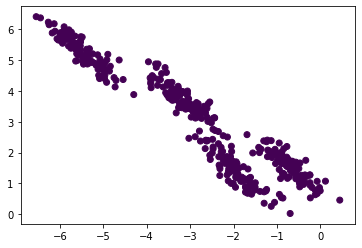

In [19]:
# Fit GMM
gmm = GaussianMixture(n_components=1)
gmm.fit(X)

# Plot results
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels);

TODO: Vary number of `n_components`. 

What number makes the most sense?

In [21]:
# A solution
for n in range(1, 11):
    # Fit GMM
    gmm = GaussianMixture(n_components=n)
    gmm.fit(X)

    # Plot results
    labels = gmm.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=labels);
    plt.title(f"{n} clusters");
    plt.show();
    display.display(plt.gcf());
    input('Press return to see next figure: ')
    display.clear_output(wait=True)

<Figure size 432x288 with 0 Axes>

GMM for Density Estimation
----- 

Let's make slightly complex data

In [22]:
from sklearn.datasets import make_moons

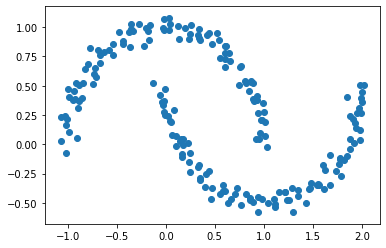

In [23]:
X_moon, y_moon = make_moons(200, noise=.05, random_state=0)
del(y_moon) # Get rid of the labels to make it unsupervised
plt.scatter(X_moon[:, 0], X_moon[:, 1]);

Remember from the beginning of today's session, we often use a Gaussian distribution to model data.

Use GMM as a collection of Gaussians to fit the data. Do __not__ separate each Gaussian into its own clusters.

In [24]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
    

TODO: Fit a GMM with a variable number of n_components.

What number of components makes the most sense?

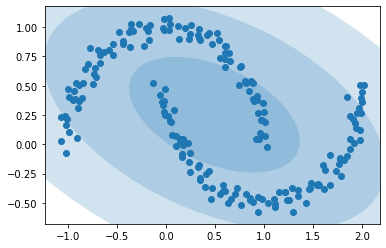

In [10]:
n = 1

gmm = GaussianMixture(n_components=n)
gmm.fit(X_moon)

plt.scatter(X_moon[:, 0],X_moon[:, 1])

# Draw a ellipse of equal likelihood around each Gaussian
for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
    draw_ellipse(pos, covar, alpha=w * 0.2 / gmm.weights_.max())

In [25]:
# A solution
for n in range(1, 20):
    gmm = GaussianMixture(n_components=n)
    gmm.fit(X_moon)
    plt.title(f"{n} Gaussians");
    plt.scatter(X_moon[:, 0],X_moon[:, 1])

    # Draw a ellipse of equal likelihood around each Gaussian
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * 0.2 / gmm.weights_.max())
    plt.show()
    display.display(plt.gcf())
    input('Press return to see next figure: ')
    display.clear_output()

<Figure size 432x288 with 0 Axes>

Instead of guessing by visual inspection which model would be best, we can use Akaike information criterion (AIC) or the Bayesian information criterion (BIC) to do model selection.

In [12]:
gmm.aic(X_moon)

761.6814289837259

In [13]:
gmm.bic(X_moon)

778.1730158164661

TODO: Fit a GMM with a variable number of n_components and compare model fits with [Akaike information criterion (AIC)](https://en.wikipedia.org/wiki/Akaike_information_criterion) and [Bayesian information criterion (BIC)](https://en.wikipedia.org/wiki/Bayesian_information_criterion).

What number of components makes the most sense?

Does the AIC / BIC number agree or disagree with your intuition?

Why would we choose to compare models with AIC / BIC vs cross validation?

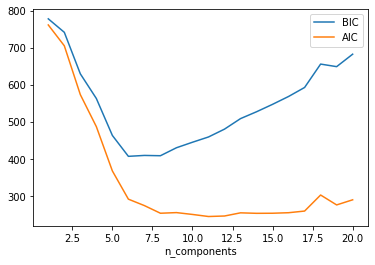

In [14]:
# A solution
n_components = np.arange(1, 21)
models = [GaussianMixture(n, random_state=0).fit(X_moon)
          for n in n_components]

plt.plot(n_components, [m.bic(X_moon) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_moon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');
plt.show()
# Source - https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.ht

Why would we choose to compare models with AIC / BIC vs cross validation?

<br>
<details><summary>
Click here for a solution …
</summary>
Cross validation is our best estimate of how a model might generalize.  <br>
However, we might not have enough data to support cross validation or it might take too long to conduct cross validation.
<br>

AIC / BIC requires only training data and is fast to calculate.
</details>

<br>
<br> 
<br>

----